# California Housing Prices

Median house prices for California districts derived from the 1990 census
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.

In [1]:
import numpy as np
import pandas as pd
import pyforest as pf

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


here our target variable is median_house_value. based on this variable, we are going to predict house value.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.shape

(20640, 10)

In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
sns.heatmap(df.isna())
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 2 Axes>

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

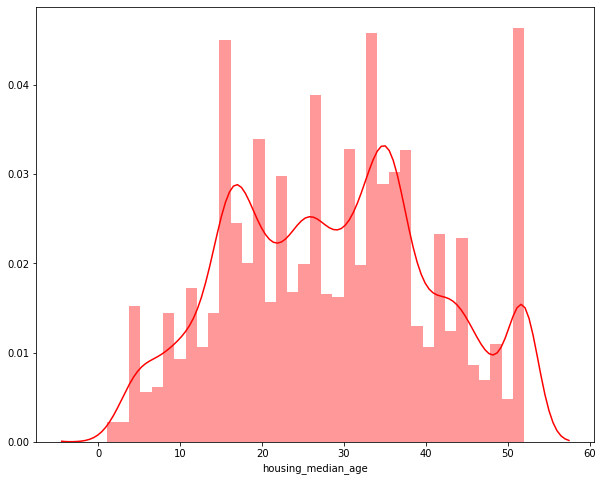

housing median age-min: 1.0
housing median age-max: 52.0


In [9]:
#Seaborn distplot lets you show a histogram with a line on it.This can be shown in all kinds of variations. 
plt.figure(figsize=(10,8))
sns.distplot(df['housing_median_age'],color = 'r')
plt.show()
print('housing median age-min:',df['housing_median_age'].min())
print('housing median age-max:',df['housing_median_age'].max())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

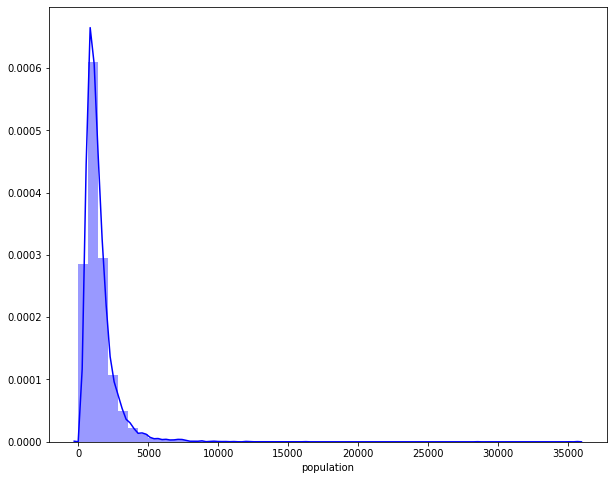

In [10]:
plt.figure(figsize=(10,8))
sns.distplot(df['population'],color = 'b')
plt.show()

## Relationship between Numerical Variables

In [11]:
#Correlation Matrix
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


The output above shows presence of strong linear correlation between the variables total_bedrooms and total_rooms and between population and total_rooms

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

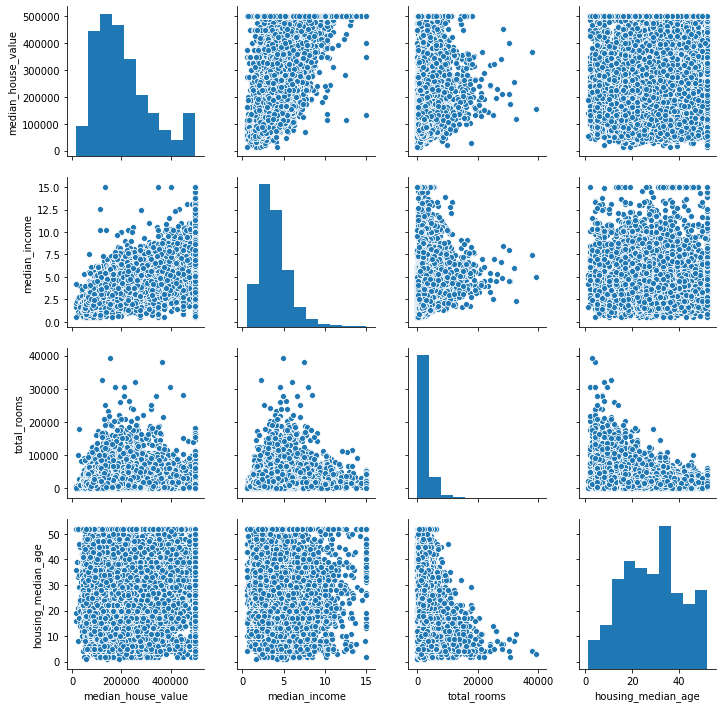

In [12]:
#import features 
df1 = df[['median_house_value','median_income','total_rooms','housing_median_age']]
sns.pairplot(df1, kind="scatter")
plt.show()

- Correlation Test

A correlation test is another method to determine the presence and extent of a linear relationship between two quantitative variables.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

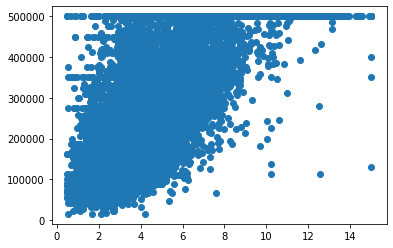

In [13]:
#this is the best variable to predict house price, but other features also important
plt.scatter( df['median_income'],df['median_house_value'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

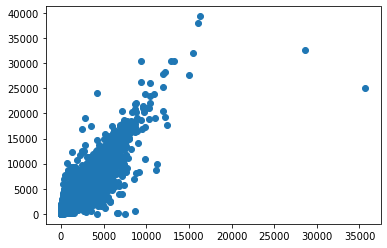

In [14]:
plt.scatter(df['population'], df['total_rooms'])
plt.show()

The above plot suggests the presence of a linear relationship between the two variables. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

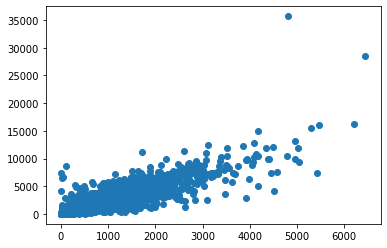

In [15]:
plt.scatter(df['total_bedrooms'], df['population'])
plt.show()

In [16]:
from scipy.stats import linregress
linregress(df['median_house_value'], df['median_income'])

LinregressResult(slope=1.1328161938855779e-05, intercept=1.5273748109684893, rvalue=0.688075207958548, pvalue=0.0, stderr=8.315925262142462e-08)

Since the p-value of 0.0 is less than 0.05, we reject the null hypothesis that the relationship between median_house_value and median_income is significant

In [17]:
#We can quantify this inference by calculating the correlation coefficient
np.corrcoef(df['population'], df['total_rooms'])

array([[1.        , 0.85712597],
       [0.85712597, 1.        ]])

The value of 0.85 shows a positive but weak linear relationship between the two variables. 

In [18]:
#finding correlation between the Target varible and all independent variables
# this is the assumption ,you should always measure the relation to dependent to all independent features
cor_matrix= df.corr()
cor_df = cor_matrix['median_house_value'].sort_values(ascending=False)
cor_df

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [19]:
from scipy.stats import linregress
linregress(df['median_house_value'], df['median_income'])

LinregressResult(slope=1.1328161938855779e-05, intercept=1.5273748109684893, rvalue=0.688075207958548, pvalue=0.0, stderr=8.315925262142462e-08)

# Handle categorical features

In [20]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [21]:
pd.get_dummies(df['ocean_proximity']).tail()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0
20639,0,1,0,0,0


In [22]:
dummy = pd.get_dummies(df['ocean_proximity'])

In [23]:
dummy.drop('ISLAND',axis=1,inplace= True)

In [24]:
dummy.head(3)

,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0


In [25]:
#merging the dummy varibles to original Dataframe
df.merge(dummy,left_index=True,right_index=True).isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
<1H OCEAN               0
INLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [26]:
# 2nd method of merging
df['<1H OCEAN'] = dummy['<1H OCEAN'].values
df['INLAND'] = dummy['INLAND'].values
df['NEAR BAY'] = dummy['NEAR BAY'].values
df['NEAR OCEAN'] = dummy['NEAR OCEAN'].values

In [27]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,1,0


In [28]:
#we have dropped those 2 variables
train = df.drop(['ocean_proximity','median_house_value'],axis=1)

In [29]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0


In [30]:
from sklearn.impute import SimpleImputer 

In [31]:
# define imputer
imputer = SimpleImputer(strategy='median')

In [32]:
imputer.fit(train)

SimpleImputer(strategy='median')

In [33]:
train.median().values

array([-118.49  ,   34.26  ,   29.    , 2127.    ,  435.    , 1166.    ,
        409.    ,    3.5348,    0.    ,    0.    ,    0.    ,    0.    ])

In [34]:
x = imputer.transform(train)

In [35]:
train_new = pd.DataFrame(x, columns = train.columns)
train_new.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,1.0,0.0


In [36]:
train_new.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
<1H OCEAN             0
INLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [37]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
<1H OCEAN             20640 non-null float64
INLAND                20640 non-null float64
NEAR BAY              20640 non-null float64
NEAR OCEAN            20640 non-null float64
dtypes: float64(12)
memory usage: 1.9 MB


In [38]:
df.shape

(20640, 14)

In [39]:
train_new.shape

(20640, 12)

In [40]:
X = train_new.values
y = df['median_house_value']

# Train test split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [43]:
X_train.shape

(16512, 12)

In [44]:
y_train.shape

(16512,)

In [45]:
X_test.shape

(4128, 12)

In [46]:
y_test.shape

(4128,)

#  Linear Regression Model

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [49]:
predictions = reg.predict(X_test[:10])
predictions

array([ 54055.448899  , 124225.33893719, 255489.37949166, 268002.43156921,
       262769.4348157 , 139606.30395561, 290665.42391419, 228264.87637531,
       256506.78561007, 407923.85843488])

In [50]:
y_train[:10]

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
17848    264800.0
6252     157300.0
9389     500001.0
6113     139800.0
6061     315600.0
Name: median_house_value, dtype: float64

In [51]:
data = {'predicted':predictions, 'Actual':y_test[:10].values, 'Diff':(predictions-y_train[:10].values) }
error_df = pd.DataFrame(data=data)
error_df

,predicted,Actual,Diff
0,54055.448899,47700.0,-48944.551101
1,124225.338937,45800.0,-257874.661063
2,255489.379492,500001.0,82889.379492
3,268002.431569,218600.0,174602.431569
4,262769.434816,278000.0,166269.434816
5,139606.303956,158700.0,-125193.696044
6,290665.423914,198200.0,133365.423914
7,228264.876375,157500.0,-271736.123625
8,256506.785610,340000.0,116706.785610
9,407923.858435,446600.0,92323.858435


# Model Evalution

let us find the r2 score when usingtesting data

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [53]:
#predicting x test
pred = reg.predict(X_test)

In [54]:
#Rmse
mse = mean_squared_error(y_test,pred)
np.sqrt(mse)

70060.521844735

In [55]:
#mae
mae = mean_absolute_error(y_test,pred)
np.sqrt(mae)

225.1016175885327

In [56]:
# Testing Accuracy
r2 = r2_score(y_test,pred)
r2
#R-squared is a statistical measure of how close the data are to the fitted regression line. 
#It is also known as the coefficient of determination,

0.6254240620553626

It depends on your research work but more then 50%, R2 value with low RMES value is acceptable 

# display R-squared value on my graph in Python

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

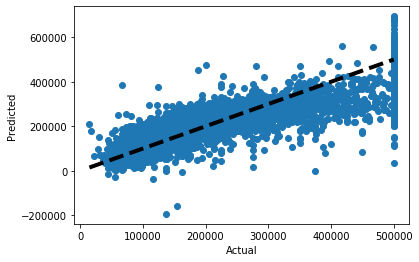

In [57]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

plt.show()

# Train Accuracy

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
scores = cross_val_score(reg,X_train,y_train,scoring = "neg_mean_squared_error",cv = 5)
rmse_score = np.sqrt(-scores)

The root-mean-squared error (RMSE) is a measure of how well your model performed. It does this by measuring difference between predicted values and the actual values.Let’s say you feed a model some input X and your model predicts 10, but the actual value is 5.

This difference between your prediction (10) and the actual observation (5) is the error term: (y_prediction - y_actual).

The error term is important because we usually want to minimize the error. In other words, our predictions are very close to the actual values.

In [60]:
rmse_score

array([68721.65876664, 67485.36849682, 67641.76081141, 67893.04481481,
       71370.84352754])

In [61]:
#traing accuracy
rmse_score.mean()

68622.53528344535

#RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

# Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
my_new_model = RandomForestRegressor()

In [64]:
my_new_model.fit(X_train,y_train)

RandomForestRegressor()

In [65]:
my_new_model.score(X_train,y_train)

0.9750035248322888

And that's 97% accuracy of the model's values with the actual values. This means that the model passes through 97% of the actual data points!!

# Decision Tree

In [66]:
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics

In [67]:
dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [68]:
dtReg_y_pred = dtReg.predict(X_test)
dtReg_y_pred

array([ 57840.14084507,  68683.33333333, 429873.49462366, ...,
       498082.61009174,  77809.31677019, 218204.87519026])

In [69]:
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

70060.521844735
